In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# movies = pd.read_csv('movies.csv')
# ratings = pd.read_csv('ratings.csv')
# tags = pd.read_csv('tag.csv')
# display(tags.head())
# display(movies.head())
# display(ratings.head())

In [3]:
# merged_data = pd.merge(ratings, movies, on='item', how='left')
# merged_data.head()

In [4]:
def get_data():
    
    movies = pd.read_csv('movies.csv')
    ratings = pd.read_csv('ratings.csv')
    
    data = pd.merge(ratings, movies, on='item', how='left')
    
    data = data.drop(['timestamp'], axis=1)
    data = data.drop(['plot'],axis=1)
    
    return data

In [5]:
data = get_data()
data.head()

,user,item,rating,title,year,genres
0,1,1,4.0,toy story,1995,Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,grumpier old men,1995,Comedy|Romance
2,1,6,4.0,heat,1995,Action|Crime|Thriller
3,1,70,3.0,from dusk till dawn,1996,Action|Comedy|Horror|Thriller
4,1,101,5.0,bottle rocket,1996,Adventure|Comedy|Crime|Romance


In [6]:
def get_sparsity(data):
    return 1 - (len(data['rating']) / (len(data['user'].unique())*len(data['item'].unique())))

In [7]:
sparsity = get_sparsity(data)
sparsity

0.9771597696056712

In [8]:
# len_ratings = len(data['rating'])
# len_users = len(data['user'].unique())
# len_items = len(data['item'].unique())

# sparsity = 1 - (len_ratings / (len_users*len_items))
# sparsity

In [9]:
data_bin = data.groupby('user').filter(lambda x: len(x)<50)
print('number of low rated users')
display(data_bin['user'].nunique())
print('total users')
display(data['user'].nunique())
print('high rating users')
display((data.groupby('user').filter(lambda x: len(x)>50))['user'].nunique())
print('ratio:')
display(data_bin['user'].nunique()/data['user'].nunique())

number of low rated users


313

total users


610

high rating users


296

ratio:


0.5131147540983606

In [10]:
data_bin2 = data.groupby('item').filter(lambda x: len(x)<10)
print('number of low rated movies')
display(data_bin2['item'].nunique())
print('total number of movies')
display(data['item'].nunique())
print('number of highly rated movies')
display((data.groupby('item').filter(lambda x: len(x)>10))['item'].nunique())
print('ratio:')
display(data_bin2['item'].nunique()/data['item'].nunique())

number of low rated movies


3124

total number of movies


4625

number of highly rated movies


1421

ratio:


0.6754594594594595

In [11]:
def filter_data(data):
    data = data.groupby('user').filter(lambda x: len(x)>50)
    data = data.groupby('item').filter(lambda x: len(x)>10)
    return data

In [12]:
# data = data.groupby('user').filter(lambda x: len(x)>50)
# data = data.groupby('item').filter(lambda x: len(x)>10)

In [13]:
# len_ratings = len(data['rating'])
# len_unique_users = len(data['user'].unique())
# len_unique_items = len(data['item'].unique())

# sparsity = 1 - (len_ratings / (len_unique_users*len_unique_items))
# sparsity

In [14]:
data = filter_data(data)
display(get_sparsity(data))

0.8863128268593556

In [15]:
data.isna().sum()

user      0
item      0
rating    0
title     0
year      0
genres    0
dtype: int64

In [16]:
data['title'].value_counts()

forrest gump                220
pulp fiction                199
jurassic park               166
fight club                  157
toy story                   154
                           ... 
what dreams may come         11
marie antoinette             11
kick-ass 2                   11
the amazing spider-man 2     11
sex and the city             11
Name: title, Length: 1354, dtype: int64

In [17]:
data['user'].value_counts()

414    1040
599     879
68      743
448     694
474     669
       ... 
503      41
342      40
108      38
184      34
571      28
Name: user, Length: 296, dtype: int64

In [18]:
data['rating'].value_counts()

4.0    12416
3.0     9175
3.5     6255
5.0     5598
4.5     3885
2.0     3259
2.5     2558
1.0     1181
1.5      716
0.5      521
Name: rating, dtype: int64

In [19]:
# data.groupby(['user']).count().sort_values(by='rating')

In [20]:
data.groupby('title').mean()['rating'].sort_values(ascending=False)

title
paths of glory                      4.545455
guess who's coming to dinner        4.545455
patton                              4.444444
ran                                 4.433333
his girl friday                     4.392857
                                      ...   
beethoven                           1.772727
superman iv: the quest for peace    1.687500
battlefield earth                   1.676471
speed 2: cruise control             1.638889
problem child                       1.583333
Name: rating, Length: 1354, dtype: float64

In [21]:
# plt.figure(figsize=(10,5))
# topmovies = data.groupby('title').mean()['rating'].sort_values(ascending=False).head(10)
# sns.barplot(topmovies.index, topmovies.values)
# plt.title('Top 10 Highest Rated Movies')
# plt.xticks(rotation=80);

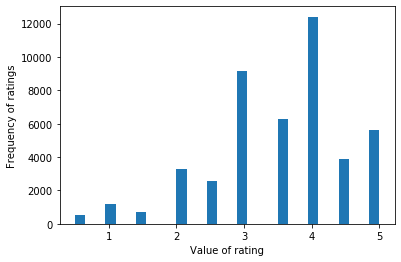

In [22]:
plt.hist(data['rating'],bins=30)
plt.xlabel('Value of rating')
plt.ylabel('Frequency of ratings')
plt.show()

In [23]:
# plt.figure(figsize=(12,7))
# topmovies = data.groupby('title').size().sort_values(ascending=False).head(10)
# sns.barplot(topmovies.index, topmovies.values)
# plt.title('Top 10 most-watched movies')
# plt.xticks(rotation=80);

In [24]:
def get_genre_labels(data):
    genrelabels = set()
    for i in data['genres'].str.split('|').values:
        genrelabels = genrelabels.union(set(i))
    
    return genrelabels

In [25]:
# genrelabels = set()
# for i in data['genres'].str.split('|').values:
#     genrelabels = genrelabels.union(set(i))

genrelabels = get_genre_labels(data)
genrelabels

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [26]:
def genrecounts(df, col, labels):
    count = dict()
    for i in labels: count[i] = 0
    for value in df[col].str.split('|'):
        if type(value) == float and pd.isnull(value): continue
        for i in value: 
            if pd.notnull(i): count[i] += 1
    genres = pd.DataFrame(list(count.items()),columns = ['Genre','Frequency'])
    return genres

In [27]:
genre_count = genrecounts(data, 'genres', genrelabels)
genres = genre_count.sort_values(by='Frequency', ascending=False)
genres

,Genre,Frequency
0,Comedy,19566
11,Drama,18142
13,Action,14725
16,Thriller,12077
18,Adventure,12017
6,Romance,9308
3,Sci-Fi,8824
4,Crime,7796
7,Fantasy,5706
1,Children,4338


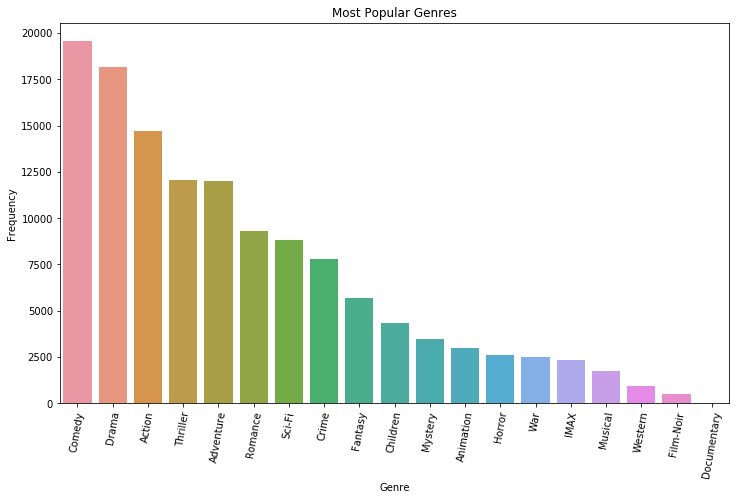

In [28]:
plt.figure(figsize=(12,7))
sns.barplot(genres['Genre'], genres['Frequency'])
plt.title('Most Popular Genres')
plt.xticks(rotation=80);

In [29]:
# for genre in genrelabels:
#     data[genre] = data['genres'].apply(lambda x: genre in x)
    
# pd.set_option('max_columns', None)
# data.head(2)

## Model

In [30]:
data_2 = data[['user','title','rating']]

In [31]:
user_rating = data_2.pivot(index='user',columns='title',values='rating').fillna(0)
user_rating.head()

title,(500) days of summer,10 cloverfield lane,10 things i hate about you,"10,000 bc",101 dalmatians,12 angry men,12 years a slave,127 hours,13 going on 30,1408,...,young guns,young guns ii,young sherlock holmes,zack and miri make a porno,zero dark thirty,zero effect,zodiac,zombieland,zoolander,zootopia
user,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

user_rating_vectors = csr_matrix(user_rating.values)
user_rating_vectors.todense()

matrix([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 3. , 0. ],
        [3.5, 4. , 0. , ..., 3.5, 4. , 4. ]])

In [33]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(user_rating_vectors)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [34]:
def get_similar_users(user, n = 5):

#     knn_input = np.asarray([user_rating.values[user-1]])
    knn_input = np.asarray(user_rating.loc[user_rating.index==user])
    distances, indices = knn.kneighbors(knn_input, n_neighbors=n+1)
  
    print(n,"similar users to the user ",user, "are: ")
    print(" ")
    for i in range(1,len(distances[0])):
        print(i,". User:", indices[0][i]+1, "with distance measure of: ",distances[0][i])
    return indices.flatten()[1:] + 1, distances.flatten()[1:]

In [35]:
def get_random_user():
    total_users = data_2.groupby(['user']).count()
    total_users = total_users.index
    selected_user = np.random.choice(total_users)
    
    return selected_user

In [56]:
def get_mean_distance(user, n):
    
    knn_input = np.asarray(user_rating.loc[user_rating.index==user])
    distances, indices = knn.kneighbors(knn_input, n_neighbors=n+1)
    mean_distance = np.mean(distances)
    
    return mean_distance

In [36]:
# knn_input = np.asarray(user_rating.loc[user_rating.index==4])
# inp = np.asarray([user_rating.values[1]])
# display(knn_input)
# display(inp)
# print(np.array_equal(knn_input,inp))

In [37]:
from pprint import pprint
user_id = get_random_user()
print("random user: " + str(user_id))
print("movies seen by "+str(user_id) + ":")
pprint(list(data_2[data_2['user'] == user_id]['title'])[:10])
similar_users, distances = get_similar_users(user_id,5)

random user: 7
movies seen by 7:
['toy story',
 'apollo 13',
 'forrest gump',
 'true lies',
 'hot shots! part deux',
 'jurassic park',
 'ghost',
 'aladdin',
 'terminator 2: judgment day',
 'batman']
5 similar users to the user  7 are: 
 
1 . User: 215 with distance measure of:  0.6139182240880293
2 . User: 115 with distance measure of:  0.6276751579407093
3 . User: 295 with distance measure of:  0.6409701727518191
4 . User: 105 with distance measure of:  0.647189694657055
5 . User: 112 with distance measure of:  0.65745531015694


In [63]:
sim_close, user_close_distance = get_similar_users(user_id,5)
sim_total, user_total_distance= get_similar_users(user_id,len(user_rating.index)-1)
display(np.mean(user_close_distance))
display(np.mean(user_total_distance))
display((np.mean(user_close_distance)/np.mean(user_total_distance)))

5 similar users to the user  7 are: 
 
1 . User: 215 with distance measure of:  0.6139182240880293
2 . User: 115 with distance measure of:  0.6276751579407093
3 . User: 295 with distance measure of:  0.6409701727518191
4 . User: 105 with distance measure of:  0.647189694657055
5 . User: 112 with distance measure of:  0.65745531015694
295 similar users to the user  7 are: 
 
1 . User: 215 with distance measure of:  0.6139182240880293
2 . User: 115 with distance measure of:  0.6276751579407093
3 . User: 295 with distance measure of:  0.6409701727518191
4 . User: 105 with distance measure of:  0.647189694657055
5 . User: 112 with distance measure of:  0.65745531015694
6 . User: 80 with distance measure of:  0.6582761302638467
7 . User: 276 with distance measure of:  0.6648653302743721
8 . User: 232 with distance measure of:  0.673438388971637
9 . User: 207 with distance measure of:  0.6747098630329166
10 . User: 132 with distance measure of:  0.6749992886671559
11 . User: 170 with distanc

0.6374417119189106

0.8186643061292155

0.7786362580443306

In [60]:
similar_users, distances

(array([215, 115, 295, 105, 112]),
 array([0.61391822, 0.62767516, 0.64097017, 0.64718969, 0.65745531]))

In [39]:
normalised_distances = distances/np.sum(distances)
normalised_distances

array([0.19261941, 0.1969357 , 0.20110707, 0.20305847, 0.20627935])

In [40]:
similar_users_ratings = user_rating.values[similar_users]
similar_users_ratings

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [3.5, 4. , 0. , ..., 3.5, 4. , 4. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [41]:
movies_list = user_rating.columns
movies_list

Index(['(500) days of summer', '10 cloverfield lane',
       '10 things i hate about you', '10,000 bc', '101 dalmatians',
       '12 angry men', '12 years a slave', '127 hours', '13 going on 30',
       '1408',
       ...
       'young guns', 'young guns ii', 'young sherlock holmes',
       'zack and miri make a porno', 'zero dark thirty', 'zero effect',
       'zodiac', 'zombieland', 'zoolander', 'zootopia'],
      dtype='object', name='title', length=1354)

In [42]:
weights = normalised_distances[:,np.newaxis] + np.zeros(len(movies_list))
weights.shape

(5, 1354)

In [43]:
new_rating_matrix = weights*similar_users_ratings
mean_rating_list = new_rating_matrix.sum(axis =0)
mean_rating_list

array([0.70387474, 0.80442828, 0.        , ..., 0.70387474, 0.80442828,
       0.80442828])

In [44]:
from pprint import pprint
def recommend_movies(n,mean_ratings):
    n = min(len(mean_ratings),n)
    pprint(list(movies_list[np.argsort(mean_ratings)[::-1][:n]]))
    
print("Movies recommended based on similar users are: ")
print("NOTE: movies here might be repeated from the user's watch list")
recommend_movies(10, mean_rating_list)

Movies recommended based on similar users are: 
NOTE: movies here might be repeated from the user's watch list
['pulp fiction',
 'forrest gump',
 'terminator 2: judgment day',
 'jurassic park',
 "schindler's list",
 'eternal sunshine of the spotless mind',
 'fight club',
 'fargo',
 '25th hour',
 'trainspotting']


In [45]:
def filtered_movie_recommendations(n,mean_ratings):
  
    first_zero_index = np.where(mean_ratings == 0)[0][-1]
    sortd_index = np.argsort(mean_ratings)[::-1]
    sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
    n = min(len(sortd_index),n)
    movies_watched = list(data_2[data_2['user'] == user_id]['title'])
    filtered_movie_list = list(movies_list[sortd_index])
    count = 0
    final_movie_list = []
    for i in filtered_movie_list:
        if i not in movies_watched:
            count+=1
            final_movie_list.append(i)
        if count == n:
            break
    if count == 0:
        print("user has watched everything that the similar users watched")
    else:
        pprint(final_movie_list)

In [46]:
filtered_movie_recommendations(10,mean_rating_list)

['pulp fiction',
 "schindler's list",
 'eternal sunshine of the spotless mind',
 'fight club',
 'fargo',
 '25th hour',
 'trainspotting',
 'speed',
 'braveheart',
 'broken arrow']
